# Learning curves

In [29]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

## Data

In [32]:
sample_sizes = [100, 1000]
methods = ['maf', 'scandal']
method_labels = ['MAF', 'SCANDAL']
loss_labels = ['loss', 'loss_nll']
n_methods = len(methods)

In [33]:
learning_curves_train = []
learning_curves_val = []

for method, loss_label in zip(methods, loss_labels):
    learning_curves_train_this_method = []
    learning_curves_val_this_method = []
    
    for sample_size in sample_sizes:
        learning_curve_train = np.load('../data/results/epidemiology/' + method
                                 + '/epidemiology_' + method + '_trainingsamplesize_'
                                 + str(sample_size) + '_train_' + loss_label + '.npy')
        learning_curve_val = np.load('../data/results/epidemiology/' + method
                                 + '/epidemiology_' + method + '_trainingsamplesize_'
                                 + str(sample_size) + '_validation_' + loss_label + '.npy')
        
        learning_curves_train_this_method.append(learning_curve_train)
        learning_curves_val_this_method.append(learning_curve_val)
        
    learning_curves_train.append(learning_curves_train_this_method)
    learning_curves_val.append(learning_curves_val_this_method)
    
learning_curves_train = np.array(learning_curves_train)
learning_curves_val = np.array(learning_curves_val)


## Plot learning curves

In [34]:
colors = ['C' + str(i) for i in range(10)]

In [35]:
learning_curves_train[0][-1]

array([385.87158241, 273.69154397, 219.1615991 , 184.26772563,
       160.99139181, 139.94080995, 126.40559709, 114.98299505,
       107.07601267, 100.44753597,  92.71541826,  87.43950048,
        82.46734464,  79.59772164,  75.15913597,  71.74440074,
        69.12797278,  66.63574347,  64.37562439,  61.82118758,
        60.51937451,  57.80398835,  56.16273666,  55.13900394,
        53.30299795,  52.33413113,  51.06662492,  49.29447998,
        49.21486598,  48.43795482,  46.96358091,  46.08119092,
        45.69251841,  44.68246363,  44.55984442,  43.98973123,
        43.13656976,  42.31422825,  42.8320527 ,  41.5976801 ,
        40.95149213,  41.17252613,  40.15317293,  40.16288932,
        39.94755914,  39.01190697,  39.00365075,  39.09139232,
        37.97933171,  37.76812359])

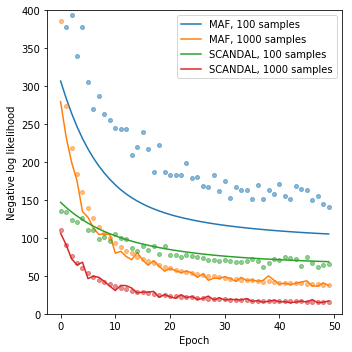

In [41]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()



for m, method in enumerate(method_labels):
    for s, sample_size in enumerate(sample_sizes):
        plt.plot(learning_curves_train[m][s],
                 c=colors[m*len(sample_sizes) + s], ls=' ', marker='o', ms=4., alpha=0.5)
        plt.plot(learning_curves_val[m][s],
                 c=colors[m*len(sample_sizes) + s], lw=1.5, ls='-',
                 label=method + ', ' + str(sample_size) + ' samples')

    plt.legend()

    plt.xlabel('Epoch')
    plt.ylabel('Negative log likelihood')
    plt.ylim(0.,400.)
        
    

plt.tight_layout()
plt.show()
